In [15]:
import qiskit
from qiskit import QuantumCircuit

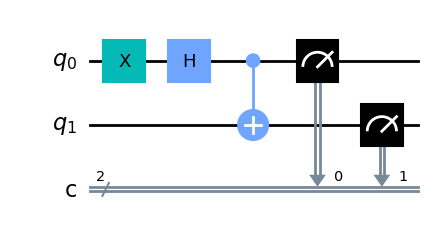

In [16]:
n_qubits = 2
qc = QuantumCircuit(n_qubits, n_qubits)#both classical and quantum bits,both \bra{0}
qc.x(0)# change 0 into 1 for the first bit
qc.h(0)
for i in range(n_qubits - 1):
    qc.cx(i, i + 1)
qc.measure(list(range(n_qubits)), list(range(n_qubits)))
qc.draw('mpl')

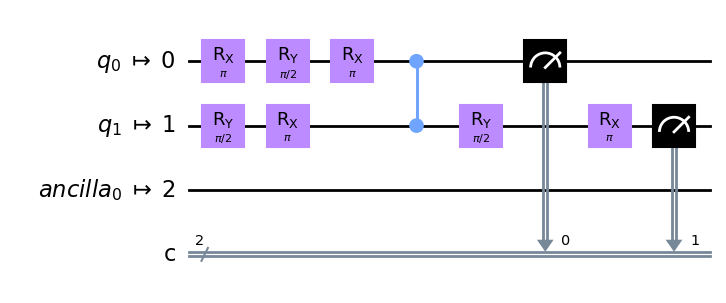

In [17]:
from qiskit_aer import AerSimulator
from qiskit import transpile
tqc = transpile(qc, basis_gates=['rx', 'cz', 'ry', 'rz'], coupling_map=[[0, 1], [1, 2]], optimization_level=0)
#Change qc into a new from which can be applied in the Q machine
tqc.draw('mpl')

In [18]:
simulator = AerSimulator()
result = simulator.run(tqc, shots=3000).result()
counts = result.get_counts()
print(counts)

{'00': 1545, '11': 1455}
